# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

These data describe the average SAT Verbal and Math scores from each state, as well as the percent of students in that state who took the SAT.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

In [36]:
import pandas as pd
dataset = pd.read_csv('assets/sat_scores.csv')
dataset.describe()
# It appears complete. Each column has 52 values, the mins and maxes seem reasonable.

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


##### 3. Create a data dictionary for the dataset.

column # |header  |data type |description 
---------|--------|----------|-------------------------------------------------------
column 1 |"State" | string   |two-letter abbreviation for each state, 1 row for "All"
column 2 |"Rate"  | integer  |percent of students who took SAT (out of 100)
column 3 |"Verbal"| integer  |average SAT Verbal score (out of 800)
column 4 |"Math"  | integer  |average SAT Math score (out of 800)

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
import csv
rows = []
with open('assets/sat_scores.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
f.close()

##### 5. Print the data

In [2]:
rows

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [10]:
headers = rows[0]
print(headers)
#creates a new list that includes only the first row of the data, the headers.

data = rows[1:-1] 
print(data)
#creates a new list that includes all rows but the first and last of that data, since the bottom row is
#'All' states, which would not make sense to include in analysis.

all_states = rows[-1]
print(all_states)
#I included a variable with the "All" row in case I want to use it later.

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [11]:
state_names = [row[0] for row in data]
#iterates over all rows and creates a new list that only includes data at index 0, the state names.

##### 8. Print the types of each column

In [20]:
[type(data[0][i]) for i in range(4)]
# Prints the data type of each column for only the first row of data, since all values in each column are of the same type
# to check if this assumption is true. I would use the code:
# [type(row[i]) for i in range(4) for row in data]
# or
# for row in data:
#     for i in range(4):
#         print type(row[i])

[str, str, str, str]

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [21]:
#all columns were assigned as strings by default, but only the first column 
#should be a string - the rest should be floats (to make calculations easier)
data = [[d[0], float(d[1]), float(d[2]), float(d[3])] for d in data]
#this re-assigns data to the new list which includes float values instead
data

[['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0],
 ['NH', 72.0, 520.0, 516.0],
 ['RI', 71.0, 501.0, 499.0],
 ['PA', 71.0, 500.0, 499.0],
 ['VT', 69.0, 511.0, 506.0],
 ['ME', 69.0, 506.0, 500.0],
 ['VA', 68.0, 510.0, 501.0],
 ['DE', 67.0, 501.0, 499.0],
 ['MD', 65.0, 508.0, 510.0],
 ['NC', 65.0, 493.0, 499.0],
 ['GA', 63.0, 491.0, 489.0],
 ['IN', 60.0, 499.0, 501.0],
 ['SC', 57.0, 486.0, 488.0],
 ['DC', 56.0, 482.0, 474.0],
 ['OR', 55.0, 526.0, 526.0],
 ['FL', 54.0, 498.0, 499.0],
 ['WA', 53.0, 527.0, 527.0],
 ['TX', 53.0, 493.0, 499.0],
 ['HI', 52.0, 485.0, 515.0],
 ['AK', 51.0, 514.0, 510.0],
 ['CA', 51.0, 498.0, 517.0],
 ['AZ', 34.0, 523.0, 525.0],
 ['NV', 33.0, 509.0, 515.0],
 ['CO', 31.0, 539.0, 542.0],
 ['OH', 26.0, 534.0, 439.0],
 ['MT', 23.0, 539.0, 539.0],
 ['WV', 18.0, 527.0, 512.0],
 ['ID', 17.0, 543.0, 542.0],
 ['TN', 13.0, 562.0, 553.0],
 ['NM', 13.0, 551.0, 542.0],
 ['IL', 12.0, 576.0, 589.0],
 ['KY', 12.0, 

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [49]:
data_dict = {state_name:data[1:] for state_name, data in zip(state_names, data)}
#Creates a dictionary with state names as the key and a list of the values for that state.
#since state names are included in 'data', as the first column in each row, I only select the rows 2-4 with [1:]

# alternatively could use this code:
# data_dict = {}
# for i, state in enumerate(state_names):
#     data_dict[state] = data[i][1:] 
data_dict

{'AK': [51.0, 514.0, 510.0],
 'AL': [9.0, 559.0, 554.0],
 'AR': [6.0, 562.0, 550.0],
 'AZ': [34.0, 523.0, 525.0],
 'CA': [51.0, 498.0, 517.0],
 'CO': [31.0, 539.0, 542.0],
 'CT': [82.0, 509.0, 510.0],
 'DC': [56.0, 482.0, 474.0],
 'DE': [67.0, 501.0, 499.0],
 'FL': [54.0, 498.0, 499.0],
 'GA': [63.0, 491.0, 489.0],
 'HI': [52.0, 485.0, 515.0],
 'IA': [5.0, 593.0, 603.0],
 'ID': [17.0, 543.0, 542.0],
 'IL': [12.0, 576.0, 589.0],
 'IN': [60.0, 499.0, 501.0],
 'KS': [9.0, 577.0, 580.0],
 'KY': [12.0, 550.0, 550.0],
 'LA': [7.0, 564.0, 562.0],
 'MA': [79.0, 511.0, 515.0],
 'MD': [65.0, 508.0, 510.0],
 'ME': [69.0, 506.0, 500.0],
 'MI': [11.0, 561.0, 572.0],
 'MN': [9.0, 580.0, 589.0],
 'MO': [8.0, 577.0, 577.0],
 'MS': [4.0, 566.0, 551.0],
 'MT': [23.0, 539.0, 539.0],
 'NC': [65.0, 493.0, 499.0],
 'ND': [4.0, 592.0, 599.0],
 'NE': [8.0, 562.0, 568.0],
 'NH': [72.0, 520.0, 516.0],
 'NJ': [81.0, 499.0, 513.0],
 'NM': [13.0, 551.0, 542.0],
 'NV': [33.0, 509.0, 515.0],
 'NY': [77.0, 495.0, 505

##### 11. Create a dictionary with the values for each of the numeric columns

In [23]:
columns = {head:[d[i] for d in data] for i, head in enumerate(headers) if head != 'State'}
#creates a dictionary with the header names as the keys and a list of just the item in each row that goes with that header.

# alternatively could use this code:
# columns = {}
# for i, head in enumerate(headers):
#     if head != 'State':
#         columns[head] = [d[i] for d in data] 
columns

{'Math': [510.0,
  513.0,
  515.0,
  505.0,
  516.0,
  499.0,
  499.0,
  506.0,
  500.0,
  501.0,
  499.0,
  510.0,
  499.0,
  489.0,
  501.0,
  488.0,
  474.0,
  526.0,
  499.0,
  527.0,
  499.0,
  515.0,
  510.0,
  517.0,
  525.0,
  515.0,
  542.0,
  439.0,
  539.0,
  512.0,
  542.0,
  553.0,
  542.0,
  589.0,
  550.0,
  545.0,
  572.0,
  589.0,
  580.0,
  554.0,
  568.0,
  561.0,
  577.0,
  562.0,
  596.0,
  550.0,
  570.0,
  603.0,
  582.0,
  599.0,
  551.0],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [51]:
for key, value in columns.items():
    print '{}: min = {}, max = {}'.format(key, min(value), max(value))

Rate: min = 4.0, max = 82.0
Math: min = 439.0, max = 603.0
Verbal: min = 482.0, max = 593.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [52]:
def st_dev(array):
    mean = sum(array) / len(array)
    squared_diff_from_mean = [(a - mean) ** 2 for a in array]
    variance = sum(squared_diff_from_mean) / len(squared_diff_from_mean)
    return variance ** .5
for key, value in columns.items():
    print '{}: standard deviation = {}'.format(key, st_dev(value))

Rate: standard deviation = 27.2792386761
Math: standard deviation = 35.9298731731
Verbal: standard deviation = 33.0319826842


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

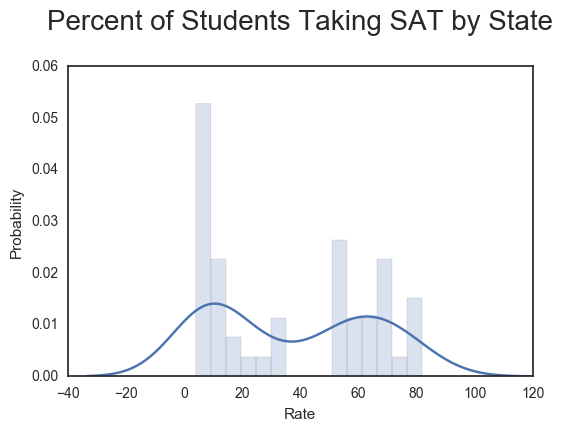

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.hist(columns['Rate'])
# plt.show()
sns.set_style('white')
rate_fig = sns.distplot(columns['Rate'], hist_kws={'alpha':0.2}, bins=15)
rate_fig.set_title('Percent of Students Taking SAT by State\n', size='20')
rate_fig.set(xlabel = 'Rate', ylabel= 'Probability')
plt.show()

This distribution appears bimodal, with a large number of states having a very low rate of SAT taking. Some states have a much higher proportion of students taking the SAT. It does not likely meet assumptions of normality.

##### 15. Plot the Math distribution

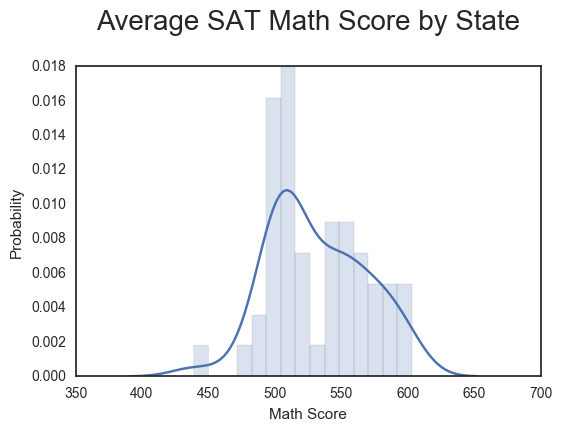

In [41]:
# plt.hist(columns['Math'])
# plt.show()
math_fig = sns.distplot(columns['Math'], hist_kws={'alpha':0.2}, bins=15)
math_fig.set_title('Average SAT Math Score by State\n', size='20')
math_fig.set(xlabel = 'Math Score', ylabel= 'Probability')
plt.show()

This distribution appears fairly normal, with a center in the low-mid 500s. No states diverge greatly with the rest.

##### 16. Plot the Verbal distribution

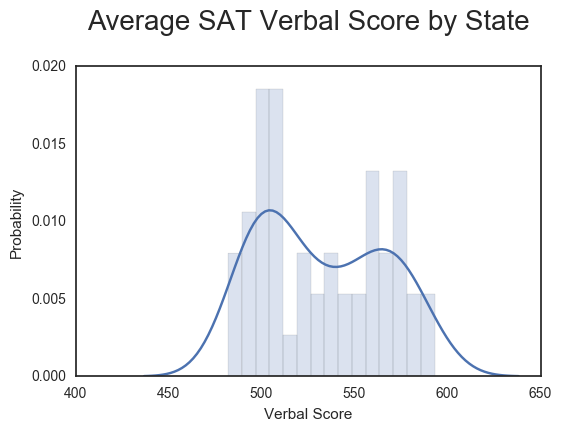

In [42]:
# plt.hist(columns['Verbal'])
# plt.show()
verbal_fig = sns.distplot(columns['Verbal'], hist_kws={'alpha':0.2}, bins=15)
verbal_fig.set_title('Average SAT Verbal Score by State\n', size=20)
verbal_fig.set(xlabel = 'Verbal Score', ylabel = 'Probability')
plt.show()

This distribution appears less normal (and possibly bimodal), with a fairly flat distribution and a center in the low-mid 500s. No states diverge greatly with the rest.

##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution is that the distribution is normal.

##### 18. Does that distribution hold true for our data?

In [44]:
from scipy.stats import describe
import numpy as np
print describe(columns['Rate']), 'median: ', np.median(columns['Rate'])
#does not appear normal, has more than one peak, and the kurtosis is too low.
print describe(columns['Math']), 'median: ', np.median(columns['Math'])
#appears closer to normal, has acceptable skewness and kurtosis - normal assumption likely met
print describe(columns['Verbal']), 'median: ', np.median(columns['Verbal'])
#does not appear normal, has more than one peak, and the kurtosis is too low.

"""Conclusion: the assumption of normality does not hold true for Rate or Verbal, but likely does for Math"""

 DescribeResult(nobs=51, minmax=(4.0, 82.0), mean=37.0, variance=759.03999999999996, skewness=0.1567369253739697, kurtosis=-1.611675481201603) median:  33.0
DescribeResult(nobs=51, minmax=(439.0, 603.0), mean=531.84313725490199, variance=1316.7749019607843, skewness=0.13979888597800413, kurtosis=-0.4865184309245274) median:  525.0
DescribeResult(nobs=51, minmax=(482.0, 593.0), mean=532.52941176470586, variance=1112.9341176470589, skewness=0.21821597422429911, kurtosis=-1.3399673179144787) median:  527.0


'Conclusion: the assumption of normality does not hold true for Rate or Verbal, but does for Math'

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

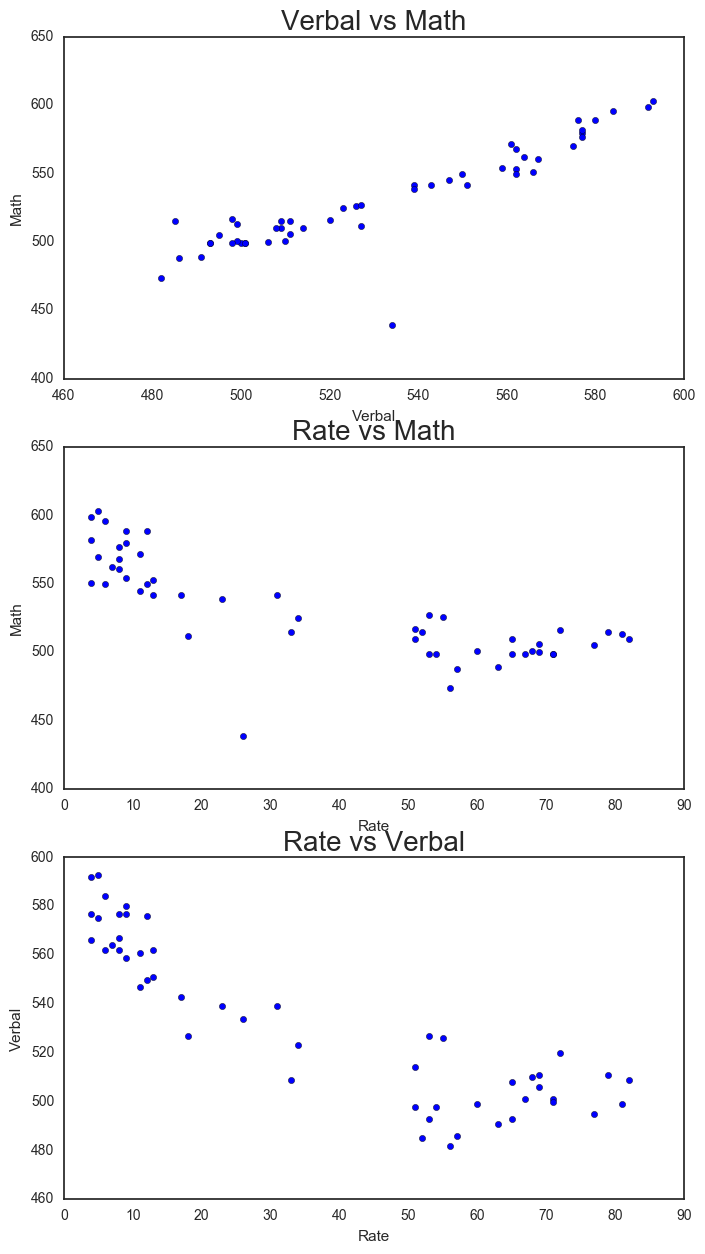

In [47]:
plt.figure(figsize=(8,15))

plt.subplot(311)
plt.scatter(columns['Verbal'], columns['Math'])
plt.title("Verbal vs Math")
plt.xlabel("Verbal")
plt.ylabel("Math")

plt.subplot(312)
plt.scatter(columns['Rate'], columns['Math'])
plt.title("Rate vs Math")
plt.xlabel("Rate")
plt.ylabel("Math")

plt.subplot(313)
plt.scatter(columns['Rate'], columns['Verbal'])
plt.title("Rate vs Verbal")
plt.xlabel("Rate")
plt.ylabel("Verbal")

plt.show()

##### 20. Are there any interesting relationships to note?

As I'd expect, higher verbal scores correlate strongly with higher math scores; what is a bit more surprising is the fact that there is a negative correlation between rate and both math and verbal scores, which suggests that the more people who take the SATs in a state, the lower their average SAT scores. This is not terribly surprising if you consider that in states where fewer students take it, it's likely those are the more advanced students (since it is a requirement for college entry at many 4-year colleges, especially the higher-ranked ones). I'm intrigued by the lack of middle values for Rate, Math scores, *and* Verbal scores. I am also intrigued by the outlier in the Math vs Verbal scores - one state has a particularly low Math score considering its moderate Verbal score. In fact, this state has the lowest score, despite having a low rate of SAT-taking. It may be interesting to learn more about this state to see if there are policies in place that might influence this.

##### 21. Create box plots for each variable. 

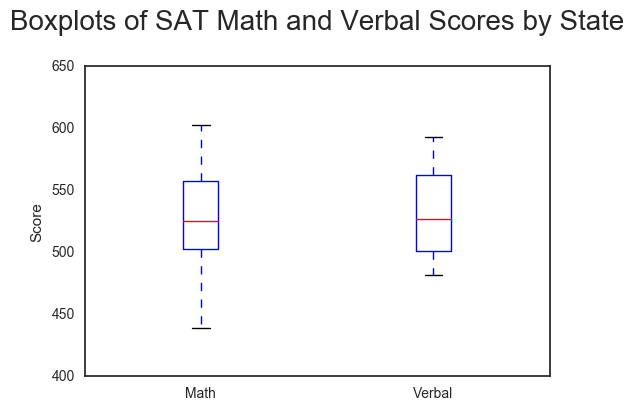

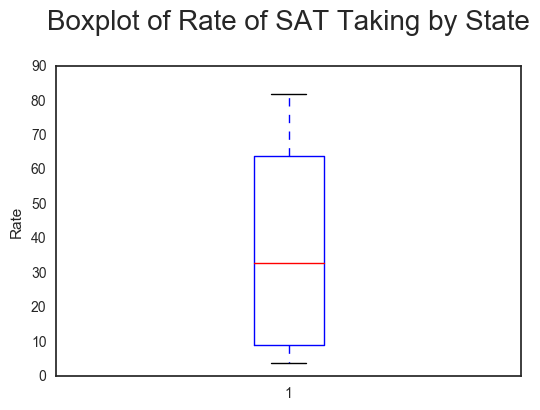

In [55]:
plt.figure()
plt.boxplot([columns['Math'], columns['Verbal']], labels=['Math', 'Verbal'])
plt.title("Boxplots of SAT Math and Verbal Scores by State\n", size=20)
plt.ylabel("Score")
plt.show()

plt.figure()
plt.boxplot(columns['Rate'])
plt.title("Boxplot of Rate of SAT Taking by State\n", size=20)
plt.ylabel("Rate")
plt.show()

The boxplots of SAT scores show that there is significantly more spread in math scores than verbal scores.

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [74]:
see 'project_1_heatmaps.twb'

/bin/sh: project_1_heatmaps.twb: command not found
